<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Two-level-system-tutorial" data-toc-modified-id="Two-level-system-tutorial-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Two-level system tutorial</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Bloch-sphere" data-toc-modified-id="Bloch-sphere-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Bloch sphere</a></span></li><li><span><a href="#Driving-two-level-system" data-toc-modified-id="Driving-two-level-system-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Driving two-level system</a></span><ul class="toc-item"><li><span><a href="#Using-RWA" data-toc-modified-id="Using-RWA-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Using RWA</a></span></li><li><span><a href="#Pulse-shape" data-toc-modified-id="Pulse-shape-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Pulse shape</a></span></li><li><span><a href="#Three-level-system" data-toc-modified-id="Three-level-system-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Three level system</a></span></li></ul></li></ul></li><li><span><a href="#Coupled-system" data-toc-modified-id="Coupled-system-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coupled system</a></span><ul class="toc-item"><li><span><a href="#Cross-resonance-dynamics" data-toc-modified-id="Cross-resonance-dynamics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cross resonance dynamics</a></span></li><li><span><a href="#full-acStark-shift-(FASt)-gate" data-toc-modified-id="full-acStark-shift-(FASt)-gate-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>full acStark shift (FASt) gate</a></span><ul class="toc-item"><li><span><a href="#Sweep-to-get-a-map-of-ZZ-rate" data-toc-modified-id="Sweep-to-get-a-map-of-ZZ-rate-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Sweep to get a map of ZZ rate</a></span></li><li><span><a href="#Two-level-system-analytic" data-toc-modified-id="Two-level-system-analytic-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Two-level system analytic</a></span></li></ul></li><li><span><a href="#Reference-with-fluxonium-system" data-toc-modified-id="Reference-with-fluxonium-system-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Reference with fluxonium system</a></span></li></ul></li></ul></div>

# Two-level system tutorial

## Import

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
from Fluxonium_hamiltonians import qchard_pshapes as pshapes
from Fluxonium_hamiltonians import qchard_evolgates as gates
import plotting_settings
import scipy.linalg
from scipy.optimize import curve_fit

## Bloch sphere

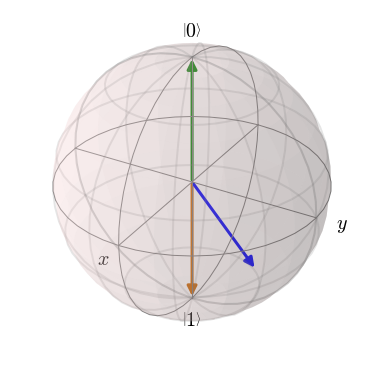

In [2]:
psi0 = basis(2,0)
psi1 = basis(2,1)
a=3
b=3j+2
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
b = Bloch()
b.add_states([psi0,psi1,psi])
b.make_sphere()

## Driving two-level system
Here, we define the two-level system via the Hamiltonian $$H=\frac{1}{2}\omega_a\sigma_Z$$ and the driving term 
$$H_d= g\cos(\omega_d t)\sigma_X$$
We can either solve the Schrodinger equation directly or use RWA to get the Hamiltonian in the rotating frame.

First, we simulate the system in the lab frame. Note the fast oscillation which is due to fast rotation in the lab frame around Z.

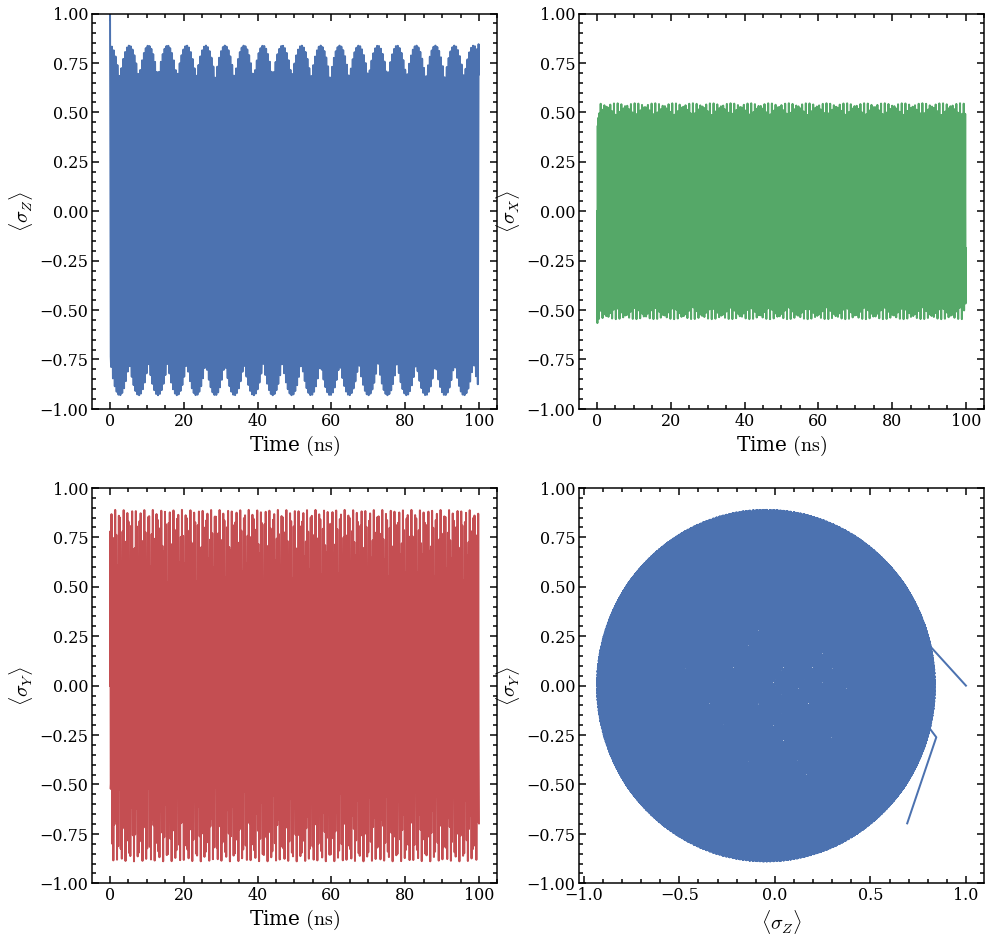

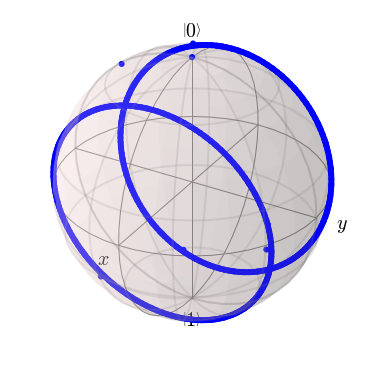

In [3]:
atom_freq = 5 #GHz
drive_freq = 5 #GHz
coupl_const = 2 #GHz
H0 = 2*np.pi*0.5*atom_freq*sigmaz()
H1 = 2*np.pi*coupl_const*sigmax()
tlist = np.linspace(0,int(100),1001) #ns
def time_dependent_term(t, **kargs):
    nu_d = kargs['omega_d']
    two_pi_t = 2 * np.pi * t
    return np.cos(nu_d * two_pi_t)
H = [H0,[H1, time_dependent_term(t=tlist, omega_d = drive_freq)]]
output = mesolve(H, rho0=basis(2,0), tlist=tlist, c_ops=[], e_ops=[])
sz = np.real(expect(sigmaz(),output.states))
sx = np.real(expect(sigmax(),output.states))
sy = np.real(expect(sigmay(),output.states))
fig, axes = plt.subplots(2,2, figsize = [16,16])
axes[0,0].plot(tlist,sz)
axes[0,0].set_ylim([-1,1])
axes[0,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,0].set_ylabel(r'$\langle \sigma_Z \rangle$')
axes[0,1].plot(tlist,sx, color = 'C1')
axes[0,1].set_ylim([-1,1])
axes[0,1].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,1].set_ylabel(r'$\langle \sigma_X \rangle$')
axes[1,0].plot(tlist,sy, color = 'C2')
axes[1,0].set_ylim([-1,1])
axes[1,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[1,0].set_ylabel(r'$\langle \sigma_Y \rangle$')
axes[1,1].plot(sz,sy)
axes[1,1].set_ylim([-1,1])
axes[1,1].set_xlabel(r'$\langle \sigma_Z \rangle$')
axes[1,1].set_ylabel(r'$\langle \sigma_Y \rangle$')

b = Bloch()
b.add_points([sx, sy, sz], meth ='s')
b.make_sphere()

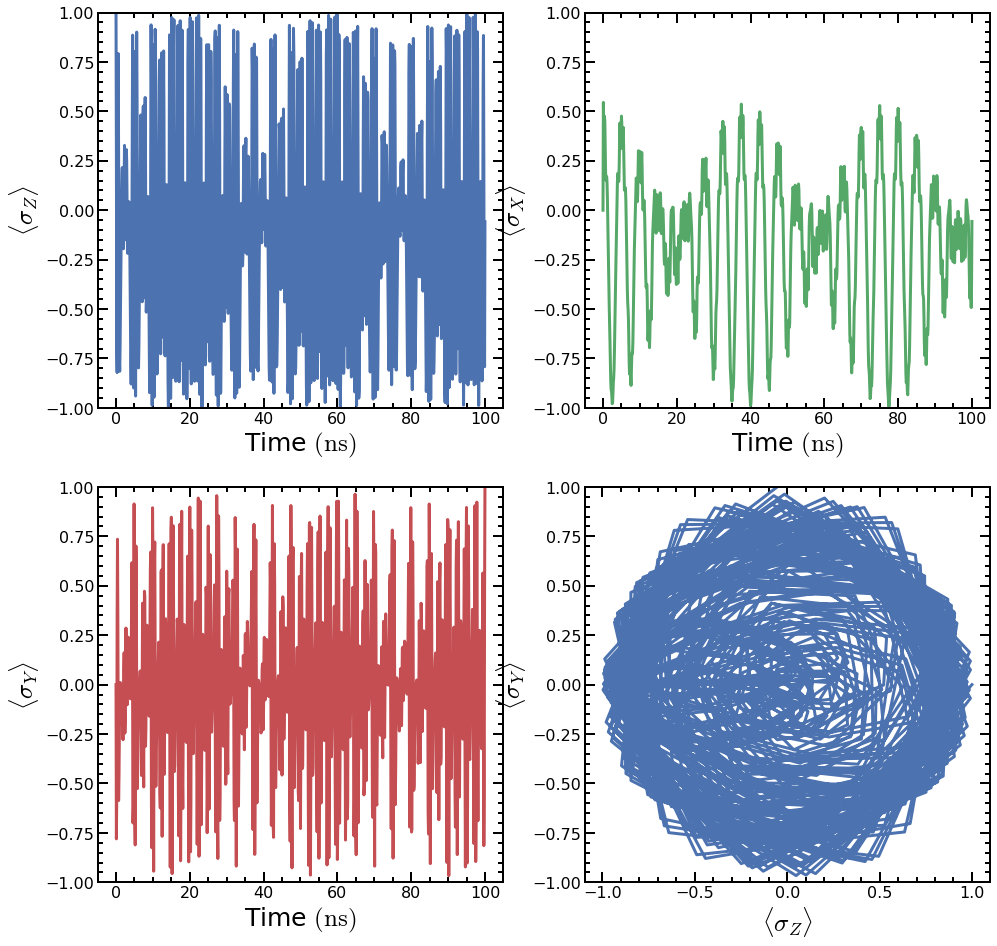

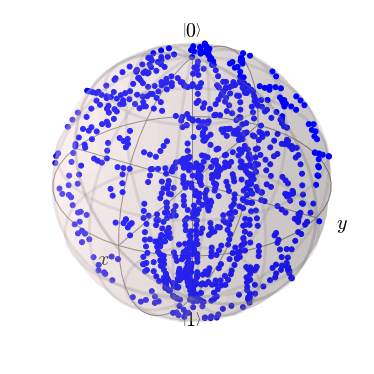

In [36]:
# Transform back to the rotating frame
sz = np.real(expect(sigmaz(),output.states))
sx = np.real(expect(sigmax(),output.states))
sy = np.real(expect(sigmay(),output.states))
fig, axes = plt.subplots(2,2, figsize = [16,16])
axes[0,0].plot(tlist,sz)
axes[0,0].set_ylim([-1,1])
axes[0,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,0].set_ylabel(r'$\langle \sigma_Z \rangle$')
axes[0,1].plot(tlist,sx*np.cos(2*np.pi*drive_freq*tlist), color = 'C1')
axes[0,1].set_ylim([-1,1])
axes[0,1].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,1].set_ylabel(r'$\langle \sigma_X \rangle$')
axes[1,0].plot(tlist,sy*np.cos(2*np.pi*drive_freq*tlist), color = 'C2')
axes[1,0].set_ylim([-1,1])
axes[1,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[1,0].set_ylabel(r'$\langle \sigma_Y \rangle$')
axes[1,1].plot(sz,sy*np.cos(2*np.pi*drive_freq*tlist))
axes[1,1].set_ylim([-1,1])
axes[1,1].set_xlabel(r'$\langle \sigma_Z \rangle$')
axes[1,1].set_ylabel(r'$\langle \sigma_Y \rangle$')

b = Bloch()
b.add_points([sx*np.cos(2*np.pi*drive_freq*tlist), sy*np.cos(2*np.pi*drive_freq*tlist), sz])
b.make_sphere()

### Using RWA

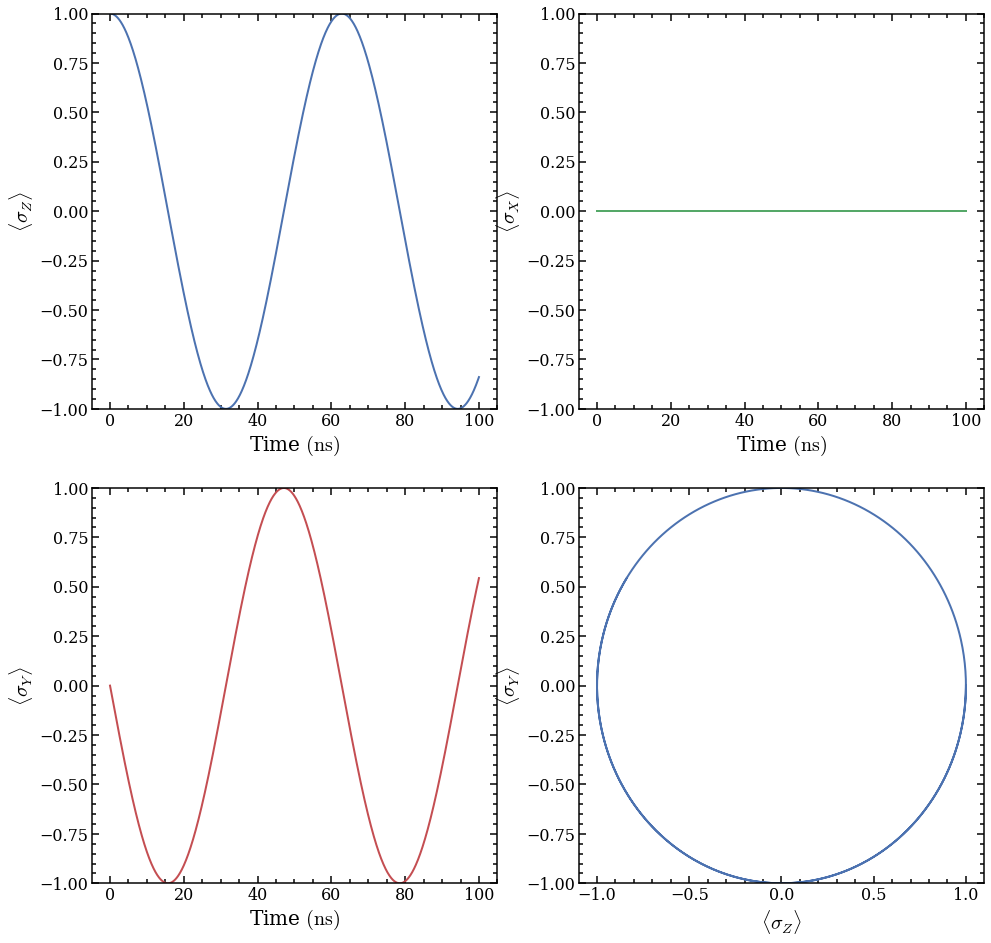

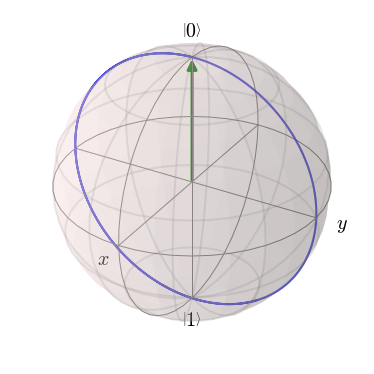

In [35]:
#Using RWA
atom_freq = 5 #GHz
drive_freq = 5 #GHz
coupl_const = 0.1 #GHz
psi_ini = basis(2,0)
# psi_ini = basis(2,0) - 1j*basis(2,1)
# psi_ini = (basis(2,0)+1j*basis(2,1))/np.sqrt(2)
psi_ini = psi_ini.unit()
H = 0.5*(atom_freq-drive_freq)*sigmaz() + 0.5*coupl_const*sigmax()
tlist = np.linspace(0,100,1001) #ns
# H = -0.1*sigmax() + np.sqrt(27/5)*0.1*sigmay()
output = mesolve(H, rho0=psi_ini,tlist = tlist, c_ops=[], e_ops=[sigmax(), sigmay(),sigmaz()])
sx, sy, sz = output.expect[:]
fig, axes = plt.subplots(2,2, figsize = [16,16])
axes[0,0].plot(tlist,sz)
axes[0,0].set_ylim([-1,1])
axes[0,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,0].set_ylabel(r'$\langle \sigma_Z \rangle$')
axes[0,1].plot(tlist,sx, color = 'C1')
axes[0,1].set_ylim([-1,1])
axes[0,1].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[0,1].set_ylabel(r'$\langle \sigma_X \rangle$')
axes[1,0].plot(tlist,sy, color = 'C2')
axes[1,0].set_ylim([-1,1])
axes[1,0].set_xlabel(r'Time $\mathrm{(ns)}$')
axes[1,0].set_ylabel(r'$\langle \sigma_Y \rangle$')
axes[1,1].plot(sz,sy)
axes[1,1].set_ylim([-1,1])
axes[1,1].set_xlabel(r'$\langle \sigma_Z \rangle$')
axes[1,1].set_ylabel(r'$\langle \sigma_Y \rangle$')

b = Bloch()
b.add_points([sx, sy, sz], meth='l')
b.add_states(psi_ini)
b.make_sphere()

0.015915487053306157


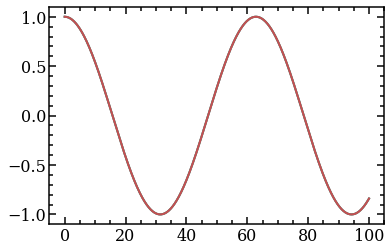

In [36]:

def cosine_func(x,amp,freq,c1,c2):
    return amp*np.cos(2*np.pi*freq*(x-c1))+c2

plt.plot(tlist, sz)
guess =[1,0.1/(2*np.pi),0,0]
plt.plot(tlist, cosine_func(tlist,*guess))
opt,cov = curve_fit(cosine_func, xdata = tlist, ydata = sz, p0=guess, maxfev = 10000)
plt.plot(tlist, cosine_func(tlist,*opt))
print (opt[1])

### Pulse shape
Above we assume a constant drive. Here, we assume that the drive can be shaped by using a modulated pulse. We can redefine the drive Hamiltonian as a product of the pulse and the carrier tone. We use the pulse shapes functions developed by Konstantin Nesterov.

In [38]:
state_0 = basis(2,0)
state_1 = basis(2,1)

atom_freq = 5 #GHz
drive_freq = 4.98 #GHz
detune = atom_freq - drive_freq
# coupl_const = np.sqrt(1+detune**2) #normalized, 1 = 2pi pulse
coupl_const = 1
H0 = 0.5*atom_freq*sigmaz()
H1 = coupl_const*sigmax()
sigma = 0.25

T_start = 0
T_gate = 50

shape = 'gauss'
drag = False
drag_coeff = 0.1
t_points = np.linspace(0,T_gate, 20*int(T_gate)+1)
U_t = gates.evolution_operator_microwave(H0,H1, t_points=t_points,
        T_gate=T_gate, shape=shape, sigma=sigma, omega_d=drive_freq)
U_nothing = gates.evolution_operator_microwave(-H0,0*sigmax(), t_points=t_points,
        T_gate=T_gate, shape=shape, sigma=sigma, omega_d=drive_freq)

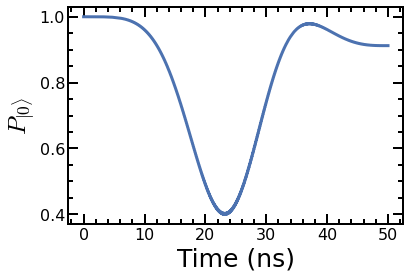

In [39]:
ini_state = basis(2,0)
fin_state = basis(2,0)
trans_prob = gates.prob_transition(U_t, ini_state, fin_state)
plt.plot(t_points, trans_prob)
plt.xlabel('Time (ns)')
plt.ylabel(r'$P_{|0\rangle}$')
U_ideal = qeye(2)
U_real = U_t[-1]
op1 = U_real.dag() * U_real
op2 = U_real * U_ideal.dag()
fidelity = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
# print(fidelity)

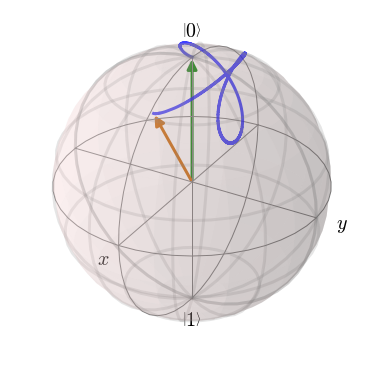

In [40]:
# Trajectory on Bloch sphere
state_in = state_0
state_evol = U_nothing * U_t * state_in

sz = np.real(expect(sigmaz(),state_evol))
sx = np.real(expect(sigmax(),state_evol))
sy = np.real(expect(sigmay(),state_evol))

b = Bloch()
b.add_points([sx, sy, sz], meth ='l')
b.add_states(state_in)
b.add_states(state_evol[-1])
b.make_sphere()

### Three level system

99.72767469359817


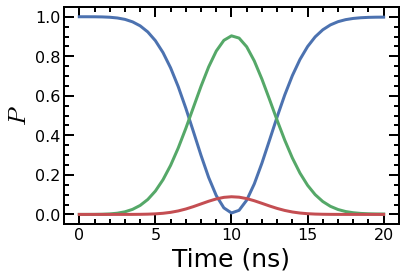

In [41]:
#Now look at three level system
wa = 5
anharmonicity = -0.2
w0 = 0
w1 = wa
w2 = 2*wa+anharmonicity
p1 = basis(3,1)*basis(3,1).dag()
p2 = basis(3,2)*basis(3,2).dag()
H0 = w1*p1 + w2*p2
a = destroy(3)
wd = wa
coupl_const = 1 #normalized to 2pi pulse
H1 = coupl_const*(a+a.dag())

T_start = 0
T_gate = 20
shape = 'gauss'
drag = True
drag_coeff = 0.5
t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)
U_t = gates.evolution_operator_microwave(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, omega_d=wd)

ini_state = basis(3,0)
trans_prob_0 = gates.prob_transition(U_t, ini_state, basis(3,0))
trans_prob_1 = gates.prob_transition(U_t, ini_state, basis(3,1))
trans_prob_2 = gates.prob_transition(U_t, ini_state, basis(3,2))
plt.plot(t_points, trans_prob_0)
plt.plot(t_points, trans_prob_1)
plt.plot(t_points, trans_prob_2)
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')

#Truncated to lowest 2 levels
P = basis(3,0)*basis(3,0).dag() + basis(3,1)*basis(3,1).dag()
U_real = P*U_t[-1]*P
U_ideal = P*qeye(3)*P
op1 = U_real.dag() * U_real
op2 = U_real * U_ideal.dag()
fidelity = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
print(fidelity*100)

# Coupled system

Text(0, 0.5, 'Transition freq')

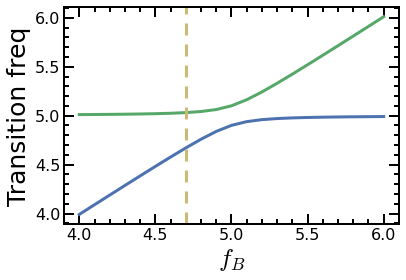

In [42]:
ZI = tensor(sigmaz(),qeye(2))
XI = tensor(sigmax(),qeye(2))
YI = tensor(sigmay(),qeye(2))
IZ = tensor(qeye(2), sigmaz())
IX = tensor(qeye(2), sigmax())
IY = tensor(qeye(2), sigmay())
XX = tensor(sigmax(), sigmax())
def coupled_tls_hamiltonian(wa,wb,g):
    return wa*ZI/2 + wb*IZ/2 + g*XX

freq_a = 5
freq_b = np.linspace(4,6,21)
coupling = 0.1
energies = np.zeros((len(freq_b), 4))
for idx, wb in enumerate(freq_b):
    energies[idx,:] = coupled_tls_hamiltonian(freq_a,wb,coupling).eigenenergies()
for idy in range(1,3):
    plt.plot(freq_b, energies[:,idy]-energies[:,0])
plt.axvline(x=4.7, color='C4', linestyle='--')
plt.xlabel(r'$f_B$')
plt.ylabel('Transition freq')

Text(0, 0.5, '$\\delta f_{00-10}$ (MHz)')

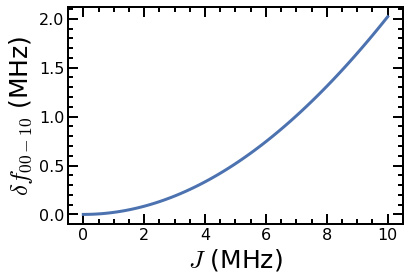

In [43]:
freq_a = 500
freq_b = 550
coupling = np.linspace(0,10,101)
energies = np.zeros((len(coupling), 4))
for idx, g in enumerate(coupling):
    energies[idx,:] = coupled_tls_hamiltonian(freq_a,freq_b,g).eigenenergies()
trans_freq = energies[:,2]   - energies[:,0]
trans_freq = (trans_freq - np.min(trans_freq))
plt.plot(coupling, trans_freq)
plt.xlabel(r'$J$ (MHz)')
plt.ylabel(r'$\delta f_{00-10}$ (MHz)')

## Cross resonance dynamics

In [44]:
#Hamiltonian (undriven)
freq_a = 5 
freq_b = 4.8 
g = 0.01
coupl_const = 20

# A: 00-10, 01-11, B: 00-01, 10-11 
H0 = 0.5*(freq_a*ZI+freq_b*IZ) + g*XX
eig_energies = H0.eigenenergies()
drive_freq = eig_energies[1]-eig_energies[0] #qubit b
H1 = coupl_const*(XI+0*IX)

#Gate
T_start = 0
T_gate = 500
shape = 'square'
sigma = 0.25
T_rise = 40
drag = False
drag_coeff = 0.3
t_points = np.linspace(0,T_gate, 20*int(T_gate)+1)

In [45]:
#Using propagator
H_dum = tensor(qeye(2), qeye(2))
U_t = gates.evolution_operator_microwave(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
U_nothing = gates.evolution_operator_microwave(-H0,H_dum, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)


Text(0, 0.5, '$P$')

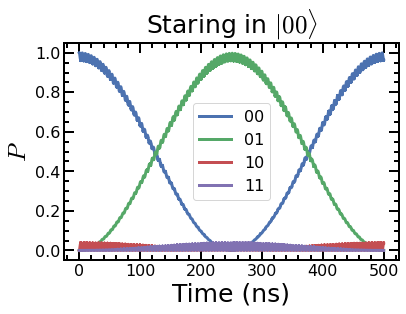

In [46]:
state_00 = tensor(basis(2,0),basis(2,0))
state_01 = tensor(basis(2,0),basis(2,1))
state_10 = tensor(basis(2,1),basis(2,0))
state_11 = tensor(basis(2,1),basis(2,1))

trans_prob_00_00 = expect(state_00 * state_00.dag(),U_t*state_00)
trans_prob_00_01 = expect(state_01 * state_01.dag(),U_t*state_00)
trans_prob_00_10 = expect(state_10 * state_10.dag(),U_t*state_00)
trans_prob_00_11 = expect(state_11 * state_11.dag(),U_t*state_00)

plt.plot(t_points, trans_prob_00_00, label = '00')
plt.plot(t_points, trans_prob_00_01, label = '01')
plt.plot(t_points, trans_prob_00_10, label = '10')
plt.plot(t_points, trans_prob_00_11, label = '11')
plt.legend()
plt.title(r'Staring in $|00\rangle$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')

2550
0.979354012517833


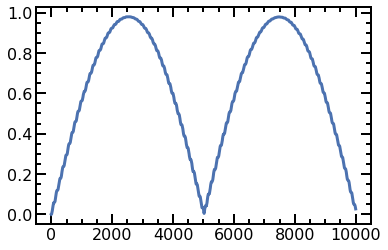

In [47]:
s0 = U_nothing*U_t*state_00
s1 = U_nothing*U_t*state_10
R = np.sqrt((expect(IX,s0)-expect(IX,s1))**2 
           +(expect(IY,s0)-expect(IY,s1))**2
           +(expect(IZ,s0)-expect(IZ,s1))**2
           )/2
plt.plot(R)
t_CNOT = np.argmax(R[0:4000])
print (t_CNOT)
print (np.max(R))

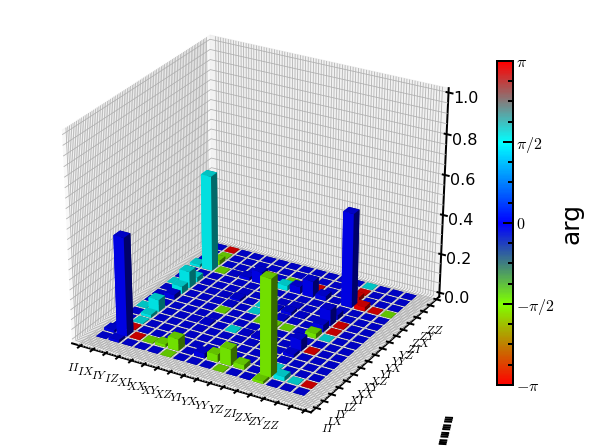

In [48]:
N = 2
U_ZX = U_nothing[t_CNOT]*U_t[t_CNOT]
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()] for i in range(N)]
U_rho = spre(U_ZX) * spost(U_ZX.dag())
chi = qpt(U_rho, op_basis)
op_label = [["$I$", "$X$", "$Y$", "$Z$"] for i in range(N)]
fig, ax = qpt_plot_combined(chi, op_label)

<ipython-input-49-884ff23464fd>:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U_Z2I = tensor(rz(-np.pi/2), qeye(2))
<ipython-input-49-884ff23464fd>:2: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U_IX2 = tensor(qeye(2), rx(-np.pi/2))


0.29918302408079456


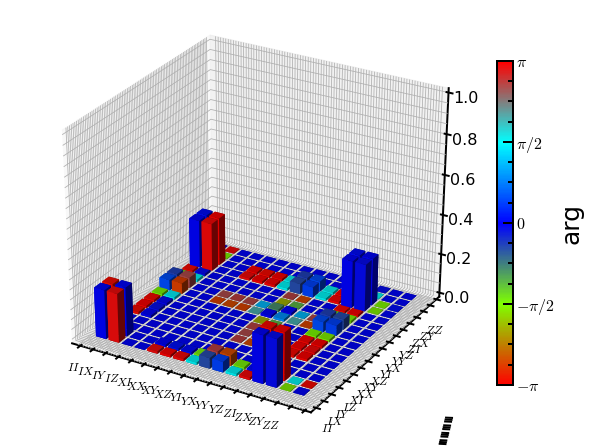

In [49]:
U_Z2I = tensor(rz(-np.pi/2), qeye(2))
U_IX2 = tensor(qeye(2), rx(-np.pi/2))
U_CNOT = U_IX2 * U_ZX * U_Z2I 

op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()] for i in range(N)]
U_rho = spre(U_CNOT) * spost(U_CNOT.dag())
chi = qpt(U_rho, op_basis)
op_label = [["$I$", "$X$", "$Y$", "$Z$"] for i in range(N)]
fig, ax = qpt_plot_combined(chi, op_label)

# U_ideal_rho = spre(cnot()) * spost(cnot().dag())
# chi_ideal=qpt(U_ideal_rho,op_basis)
# print(gates.fidelity_twoq_general(U_CNOT, cnot()))

op1 = U_real.dag() * U_real
op2 = U_real * U_ideal.dag()
fidelity = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0

print (fidelity)

## full acStark shift (FASt) gate
Here, we define the Rabi freq in term of the coupling constant.
We fix the period to be 100ns, so the Rabi frequency (GHz) is coupl_const*1e-2

In [108]:
#Hamiltonian (undriven)
# freq_a = 0.58091
# freq_b = 0.65972 
freq_a = 5.5
freq_b = 5.6
J = 0.01 #GHz
coupl_const = 1
delta_omega_d = -0.05
drive_phase = 0

# A: 00-10, 01-11, B: 00-01, 10-11 
H0 = 0.5*(freq_a*ZI+freq_b*IZ) - J*(XX)
eig_energies, eig_states = H0.eigenstates()
drive_freq = eig_energies[1]-eig_energies[0] + delta_omega_d #qubit a
H1 = coupl_const*(XI+IX)

#Gate
T_start = 0
T_gate = 200
shape = 'square'
sigma = 0.25
T_rise = 10
drag = False
drag_coeff = 0.3
t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)

In [109]:
#Using propagator
H_dum = tensor(qeye(2), qeye(2))
U_t = gates.evolution_operator_microwave(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
U_nothing = gates.evolution_operator_microwave(-H0,H_dum, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)

Text(0, 0.5, '$P$')

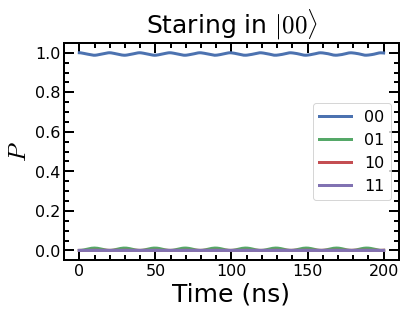

In [110]:
state_00 = eig_states[0]
state_01 = eig_states[1]
state_10 = eig_states[2]
state_11 = eig_states[3]

trans_prob_00_00 = expect(state_00 * state_00.dag(),U_t*state_00)
trans_prob_00_01 = expect(state_01 * state_01.dag(),U_t*state_00)
trans_prob_00_10 = expect(state_10 * state_10.dag(),U_t*state_00)
trans_prob_00_11 = expect(state_11 * state_11.dag(),U_t*state_00)

plt.plot(t_points, trans_prob_00_00, label = '00')
plt.plot(t_points, trans_prob_00_01, label = '01')
plt.plot(t_points, trans_prob_00_10, label = '10')
plt.plot(t_points, trans_prob_00_11, label = '11')
# plt.plot(t_points, np.cos(2*np.pi*coupl_const*1e-2 * 1e9 *t_points*1e-9))
plt.legend()
plt.title(r'Starting in $|00\rangle$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')

In [104]:
phase = np.zeros_like(t_points)
for tind in range(len(t_points)):
    u00 = U_t[tind].matrix_element(state_00.dag(), state_00)
    u01 = U_t[tind].matrix_element(state_01.dag(), state_01)
    u10 = U_t[tind].matrix_element(state_10.dag(), state_10)
    u11 = U_t[tind].matrix_element(state_11.dag(), state_11)
    phase[tind] = np.angle(u11 * u00 / (u10 * u01))

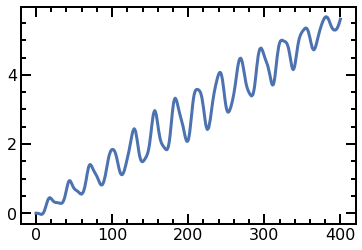

In [105]:
plt.plot(np.unwrap(phase))

In [106]:
def linear_func(x,slope,offsetx, offsety):
    return slope*(x-offsetx)+offsety
from scipy.optimize import curve_fit
opt,cov = curve_fit(linear_func, ydata = np.unwrap(phase), xdata = t_points)
print (opt[0]*1e3/(2*np.pi) , "MHz") 
# print ((np.unwrap(phase)[-1]-np.unwrap(phase)[0])*1e3*(2*np.pi)**-1/ (t_points[-1] - t_points[0]))

4.487010460013936 MHz


### Sweep to get a map of ZZ rate

In [61]:
rabi_amp_array = np.linspace(0,50,1)*1e-3 #GHz
coupl_const_array = rabi_amp_array * 1e2
drive_freq_array = np.linspace(0.45,0.6,151)
phase_evol = np.zeros((len(t_points), len(coupl_const_array), len(drive_freq_array)))
for amp_idx, coupl_const in enumerate(coupl_const_array):
    for freq_idx, drive_freq in enumerate(drive_freq_array):
        H1 = 2*coupl_const*(XI + IX)
        U_t = gates.evolution_operator_microwave(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
        for tind in range(len(t_points)):
            u00 = U_t[tind].matrix_element(state_00.dag(), state_00)
            u01 = U_t[tind].matrix_element(state_01.dag(), state_01)
            u10 = U_t[tind].matrix_element(state_10.dag(), state_10)
            u11 = U_t[tind].matrix_element(state_11.dag(), state_11)
            phase_evol[tind, amp_idx, freq_idx] = np.angle(u11 * u00 / (u10 * u01))

In [62]:
rabi_amp = 0.03
coupl_const = rabi_amp*1e2
H1 = 2*coupl_const*(XI + IX)
for freq_idx, drive_freq in enumerate(drive_freq_array):
    U_t = gates.evolution_operator_microwave(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
    T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
    for tind in range(len(t_points)):
        u00 = U_t[tind].matrix_element(state_00.dag(), state_00)
        u01 = U_t[tind].matrix_element(state_01.dag(), state_01)
        u10 = U_t[tind].matrix_element(state_10.dag(), state_10)
        u11 = U_t[tind].matrix_element(state_11.dag(), state_11)
        phase_evol[tind, amp_idx, freq_idx] = np.angle(u11 * u00 / (u10 * u01))

In [63]:
fname = '/Users/longnguyen/Documents/tmp'
np.save(fname+'_phaseZZ_TLS_comparison',phase_evol)
# print (drive_freq_array)

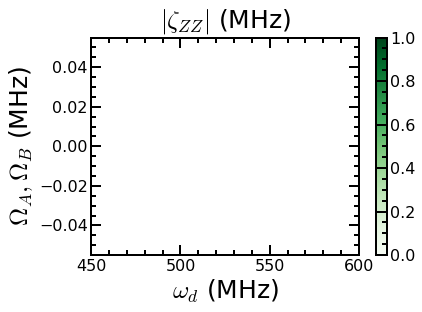

In [65]:
toFit = np.load(fname+'_phaseZZ_TLS.npy')
ZZ_rate = np.zeros((len(coupl_const_array), len(drive_freq_array)))
for a_idx in range(len(coupl_const_array)):
    for w_idx in range(len(drive_freq_array)):
        phase = np.unwrap(toFit[:,a_idx,w_idx])
        slope_guess = (phase[-1]-phase[0])/(t_points[-1]-t_points[0])
        guess = np.array([slope_guess,0,0])
        opt,cov = curve_fit(linear_func, ydata = phase, xdata = t_points, p0=guess)
        ZZ_rate[a_idx,w_idx]= abs(opt[0])*1e3/(2*np.pi)
        
X,Y = np.meshgrid(drive_freq_array*1e3,rabi_amp_array*1e3)
Z = ZZ_rate #MHz

plt.pcolor(X, Y, Z, vmax = 50, cmap = 'Greens')
plt.title(r'$|\zeta_{ZZ}|$ (MHz)')
plt.xlabel(r'$\omega_d$ (MHz)')
plt.ylabel(r'$\Omega_A,\Omega_B$ (MHz)')        
plt.colorbar()        

In [ ]:
toFit = np.load(fname+'_phaseZZ_TLS_comparison.npy')

### Two-level system analytic

In [299]:
drive_amp = np.linspace(0,50,101)
drive_freq = np.linspace(450,600,151)
zeta_ZZ = np.zeros((len(drive_freq), len(drive_amp)))
J = 8
wa = 500
wb = 550
for amp_idx, amp in enumerate(drive_amp):
    for freq_idx, wd in enumerate(drive_freq):
        delta_A = wa-wd
        delta_B = wb-wd
        zeta_ZZ[freq_idx, amp_idx]= 2*J*amp**2/(delta_A*delta_B)

<ipython-input-299-7aee89782b5d>:11: RuntimeWarning: invalid value encountered in double_scalars
  zeta_ZZ[freq_idx, amp_idx]= 2*J*amp**2/(delta_A*delta_B)
<ipython-input-299-7aee89782b5d>:11: RuntimeWarning: divide by zero encountered in double_scalars
  zeta_ZZ[freq_idx, amp_idx]= 2*J*amp**2/(delta_A*delta_B)


Text(0, 0.5, '$\\Omega_A,\\Omega_B$ (MHz)')

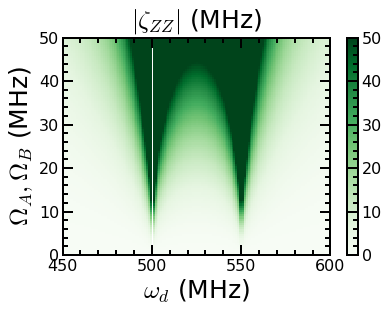

In [300]:
from matplotlib.colors import LogNorm
X,Y = np.meshgrid(drive_freq, drive_amp)
Z = abs(zeta_ZZ).transpose()
# fig, axes = plt.subplots(1,1)

plt.pcolor(X, Y, Z, vmax = 50, cmap = 'Greens')
plt.colorbar()
plt.title(r'$|\zeta_{ZZ}|$ (MHz)')
plt.xlabel(r'$\omega_d$ (MHz)')
plt.ylabel(r'$\Omega_A,\Omega_B$ (MHz)')


In [301]:
print (1/(2*10e6) * 1e9)
print (tensor(sigmaz(),sigmaz()))

50.0
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]


(0.0, 15.0)

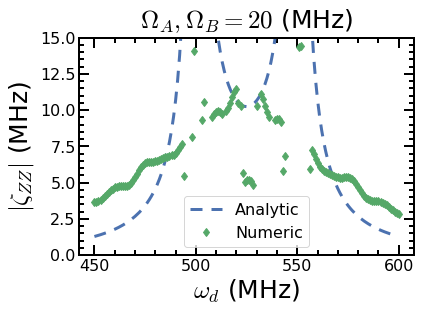

In [380]:
drive_freq = np.linspace(450,600,151)
plt.plot(drive_freq, abs(zeta_ZZ[:,40]), '--', label = 'Analytic')
plt.plot(drive_freq, ZZ_rate[20,:], 'd', label = 'Numeric')
plt.ylabel(r'$|\zeta_{ZZ}|$ (MHz)')
plt.xlabel(r'$\omega_d$ (MHz)')
plt.title(r'$\Omega_A,\Omega_B=20$ (MHz)')
plt.legend()
plt.ylim(0,15)

## Reference with fluxonium system

In [383]:
freq_a = 0.58091
freq_b = 0.65972 
J = 0.006

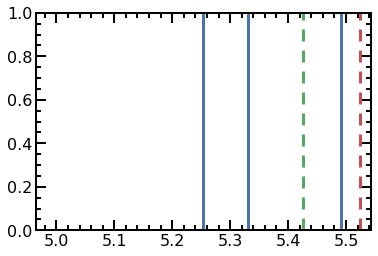

In [136]:
plt.axvline(x = 5.254)
plt.axvline(x = 5.331)
plt.axvline(x = 5.491)
plt.axvline(x = 5.425, color = 'C1', linestyle = '--')
plt.axvline(x = 5.425 + 0.1, color = 'C2', linestyle = '--')